In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import statsmodels.api as sm
import seaborn as sns

### Data import

In [5]:
house_df = pd.read_csv('train.csv')

In [6]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Understanding and Exploration

In [7]:
# Check data type
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# have a quick look at descriptive statistics
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
#check percentage of missing info
missing_info= round(house_df.isna().sum() * 100/house_df.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

There are 19 columns with missing values, 5 of those have very high percentages of missing values. Those are: PoolQC, MiscFeature, Alley, Fence, FireplaceQu

Now check the unique values in columns that have missing data

In [10]:
missing_info_cols= missing_info[missing_info > 0].sort_values(ascending= False).index

for column in missing_info_cols:
  print('\nColumn Name:',column)
  print(house_df[column].value_counts(dropna= False))


Column Name: PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

Column Name: MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

Column Name: Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

Column Name: Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

Column Name: FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

Column Name: LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64

Column Name: GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Column Name: GarageYrBlt
NaN       81
2005.0    65
2006.0    59
2004.0    53
200

<b>Replace NaN values in each column based on dictionary</b>

In [11]:
# in column 'PoolQC' (Pool quality), NaN stands for No Pool
house_df['PoolQC'] = house_df['PoolQC'].fillna('No Pool')

In [12]:
# In column 'Alley', NaN stands for No Alley Access 
house_df['Alley'] = house_df['Alley'].fillna('No alley access')

In [13]:
# In column 'Fence' (Fence Quality), NaN stands for No Fence 
house_df['Fence'] = house_df['Fence'].fillna('No Fence')

In [14]:
# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, i.e the house has no miscellaneous features.
house_df['MiscFeature'] = house_df['MiscFeature'].fillna('None')

In [15]:
# Column Electrical contain only 1 N/A value, so we might think of removing the record
house_df['Electrical'].isna().sum()

1

In [16]:
house_df=house_df.dropna(subset=['Electrical'])

In [17]:
house_df['Electrical'].isna().sum()

0

In [18]:
# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace 
house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna('No Fireplace')

In [19]:
# we can impute NAN values in column GarageYrBlt with 0
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(0)

In [20]:
# Impute missing values in LotFrontage by grouping data by neighborhood and replace missing values with median value
house_df["LotFrontage"] = house_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [21]:
# we can impute NAN values in column 'MasVnrType' (Masonry veneer type) with 0 
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(0)

In [22]:
# in column MasVnrType, we can impute it with "None"
house_df['MasVnrType'] = house_df['MasVnrType'].fillna('None')

In [23]:
# Columns of BsmtFinType1, BsmtFinType2 #BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
# can be imputed with No Basement
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    house_df[col] = house_df[col].fillna('No Basement')

In [24]:
# Columns of 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    house_df[col] = house_df[col].fillna('No Garage')

<Axes: xlabel='SalePrice', ylabel='Density'>

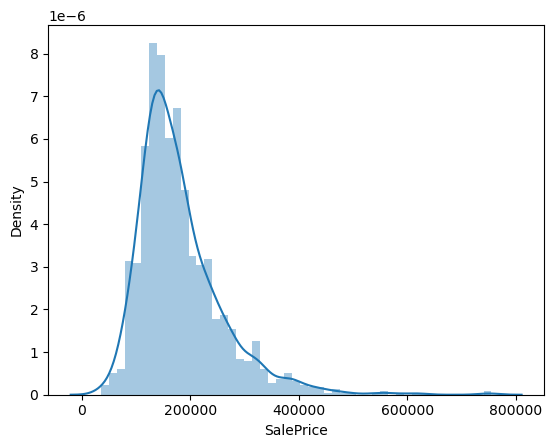

In [25]:
# Visualize the distribution of SalePrice
sns.distplot(house_df['SalePrice'])

Observation: The distribution for the target value SalePrice is right-skewed

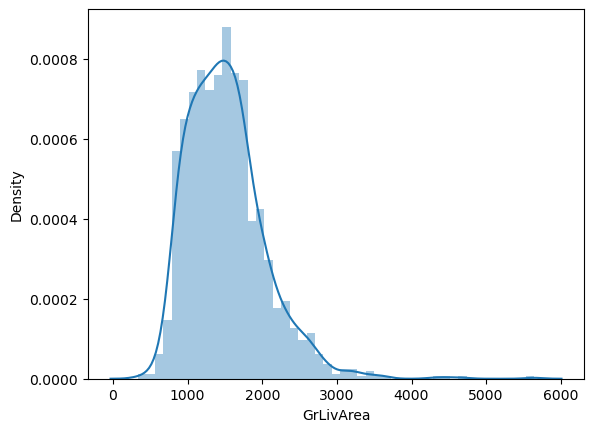

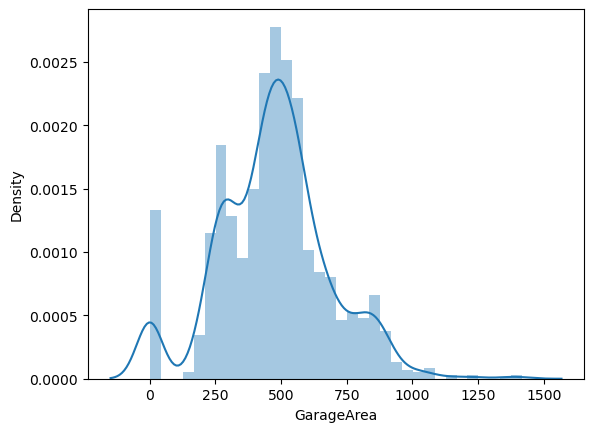

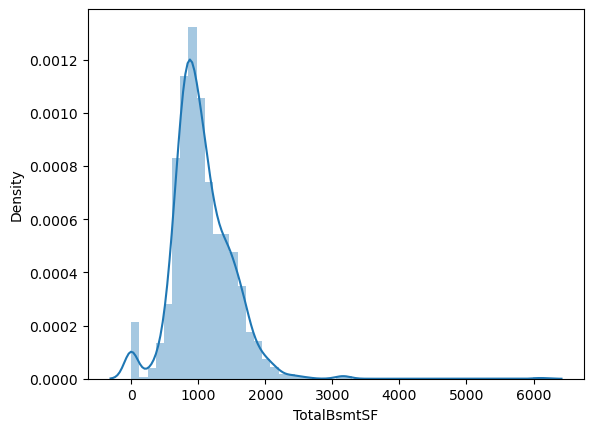

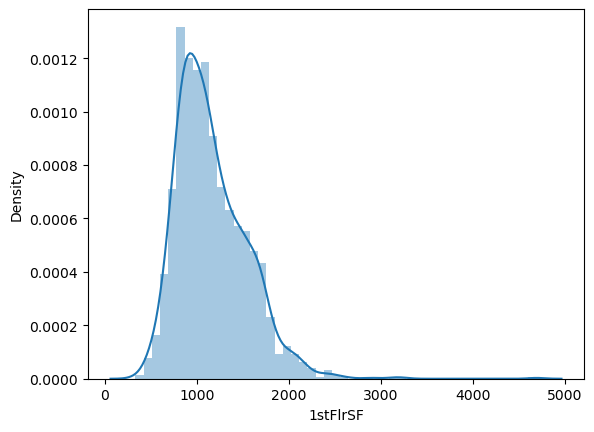

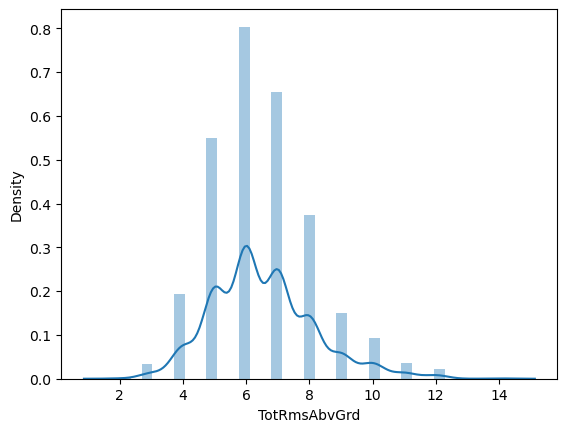

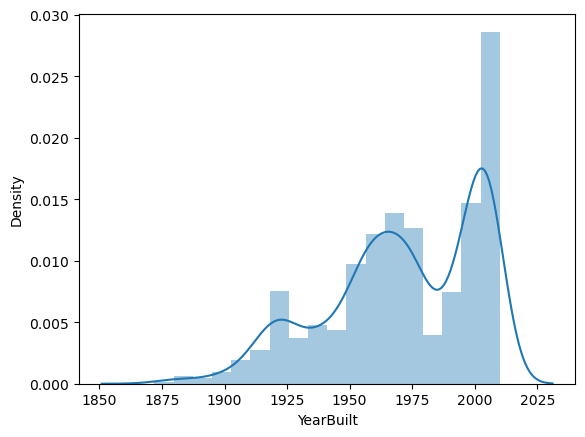

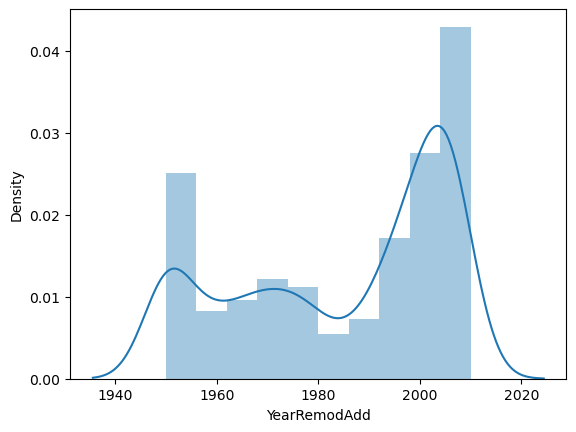

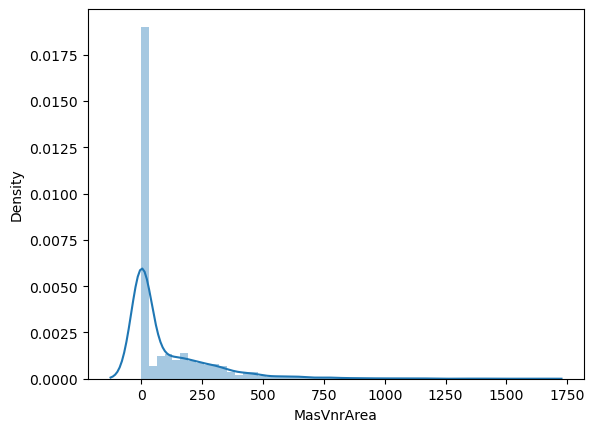

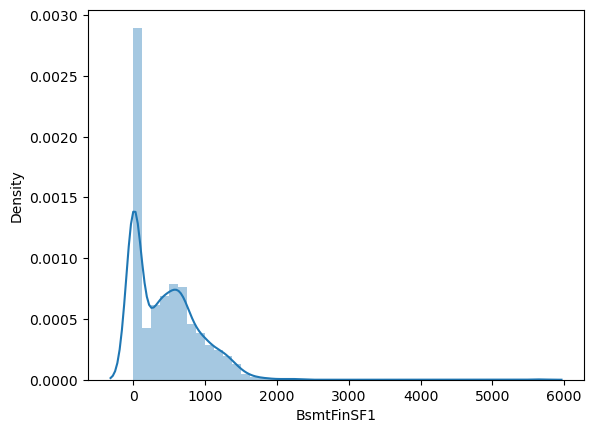

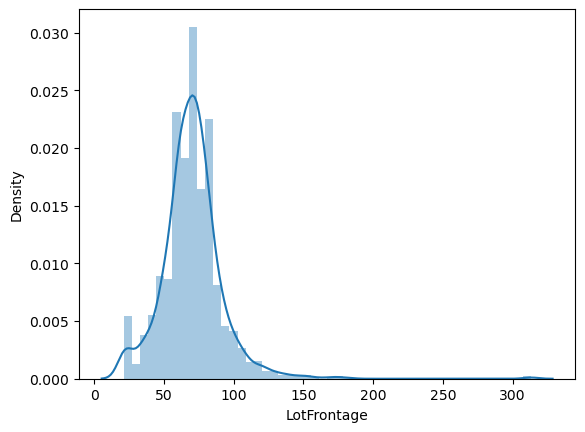

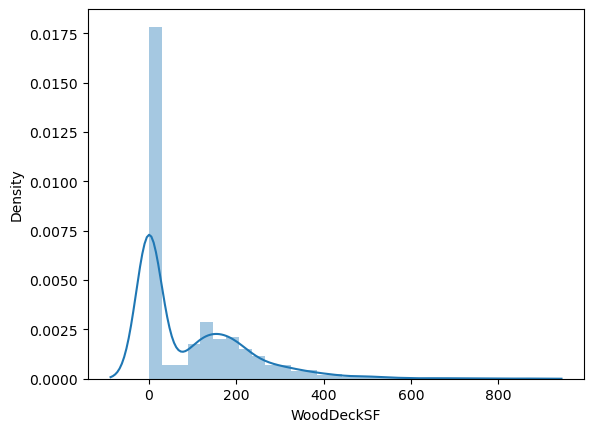

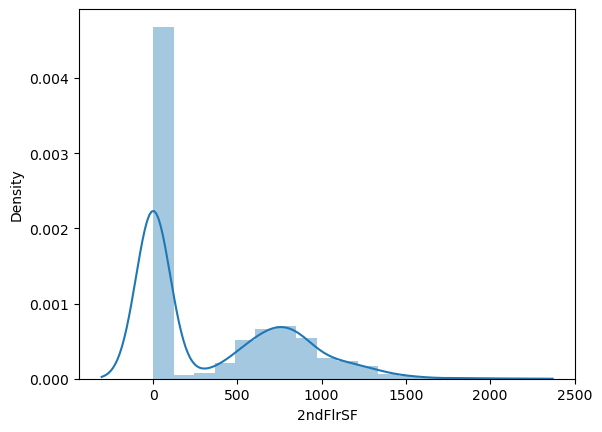

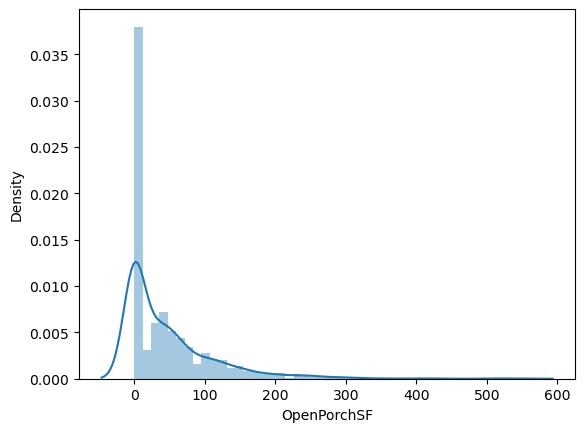

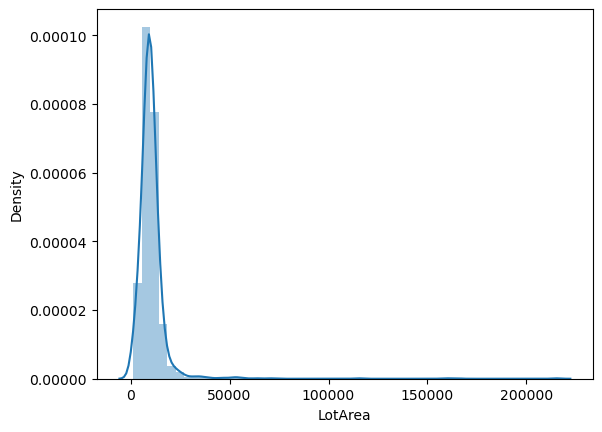

In [26]:
# Visualize the distribution of numeric columns
numeric_cols= ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']

for col in numeric_cols:
    sns.distplot(house_df[col])
    plt.show()


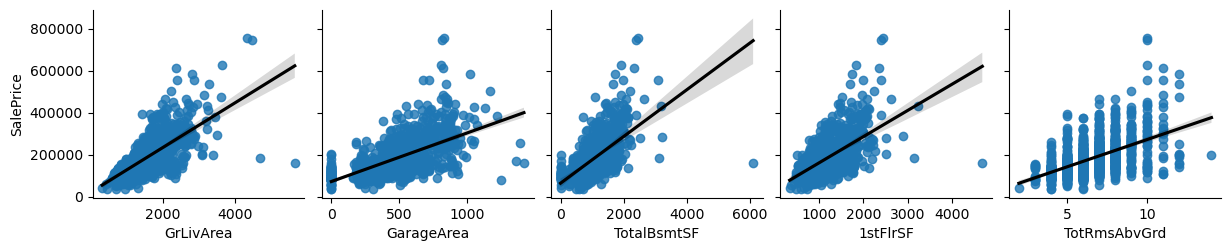

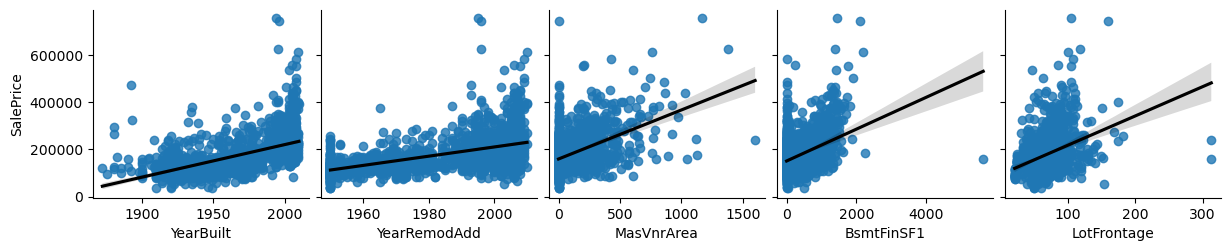

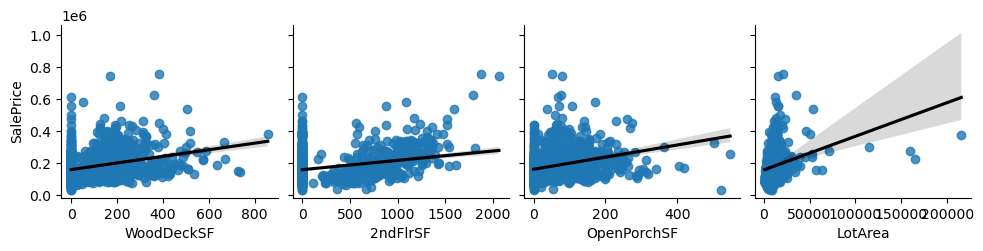

In [27]:
# Plot numeric variables against SalePrice

# sns.pairplot(housing_df, x_vars=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(house_df, x_vars=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'black'}})
sns.pairplot(house_df, x_vars=['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','LotFrontage'], y_vars='SalePrice',kind= 'reg', plot_kws={'line_kws':{'color':'black'}})
sns.pairplot(house_df, x_vars=['WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea'], y_vars='SalePrice',kind= 'reg', plot_kws={'line_kws':{'color':'black'}})

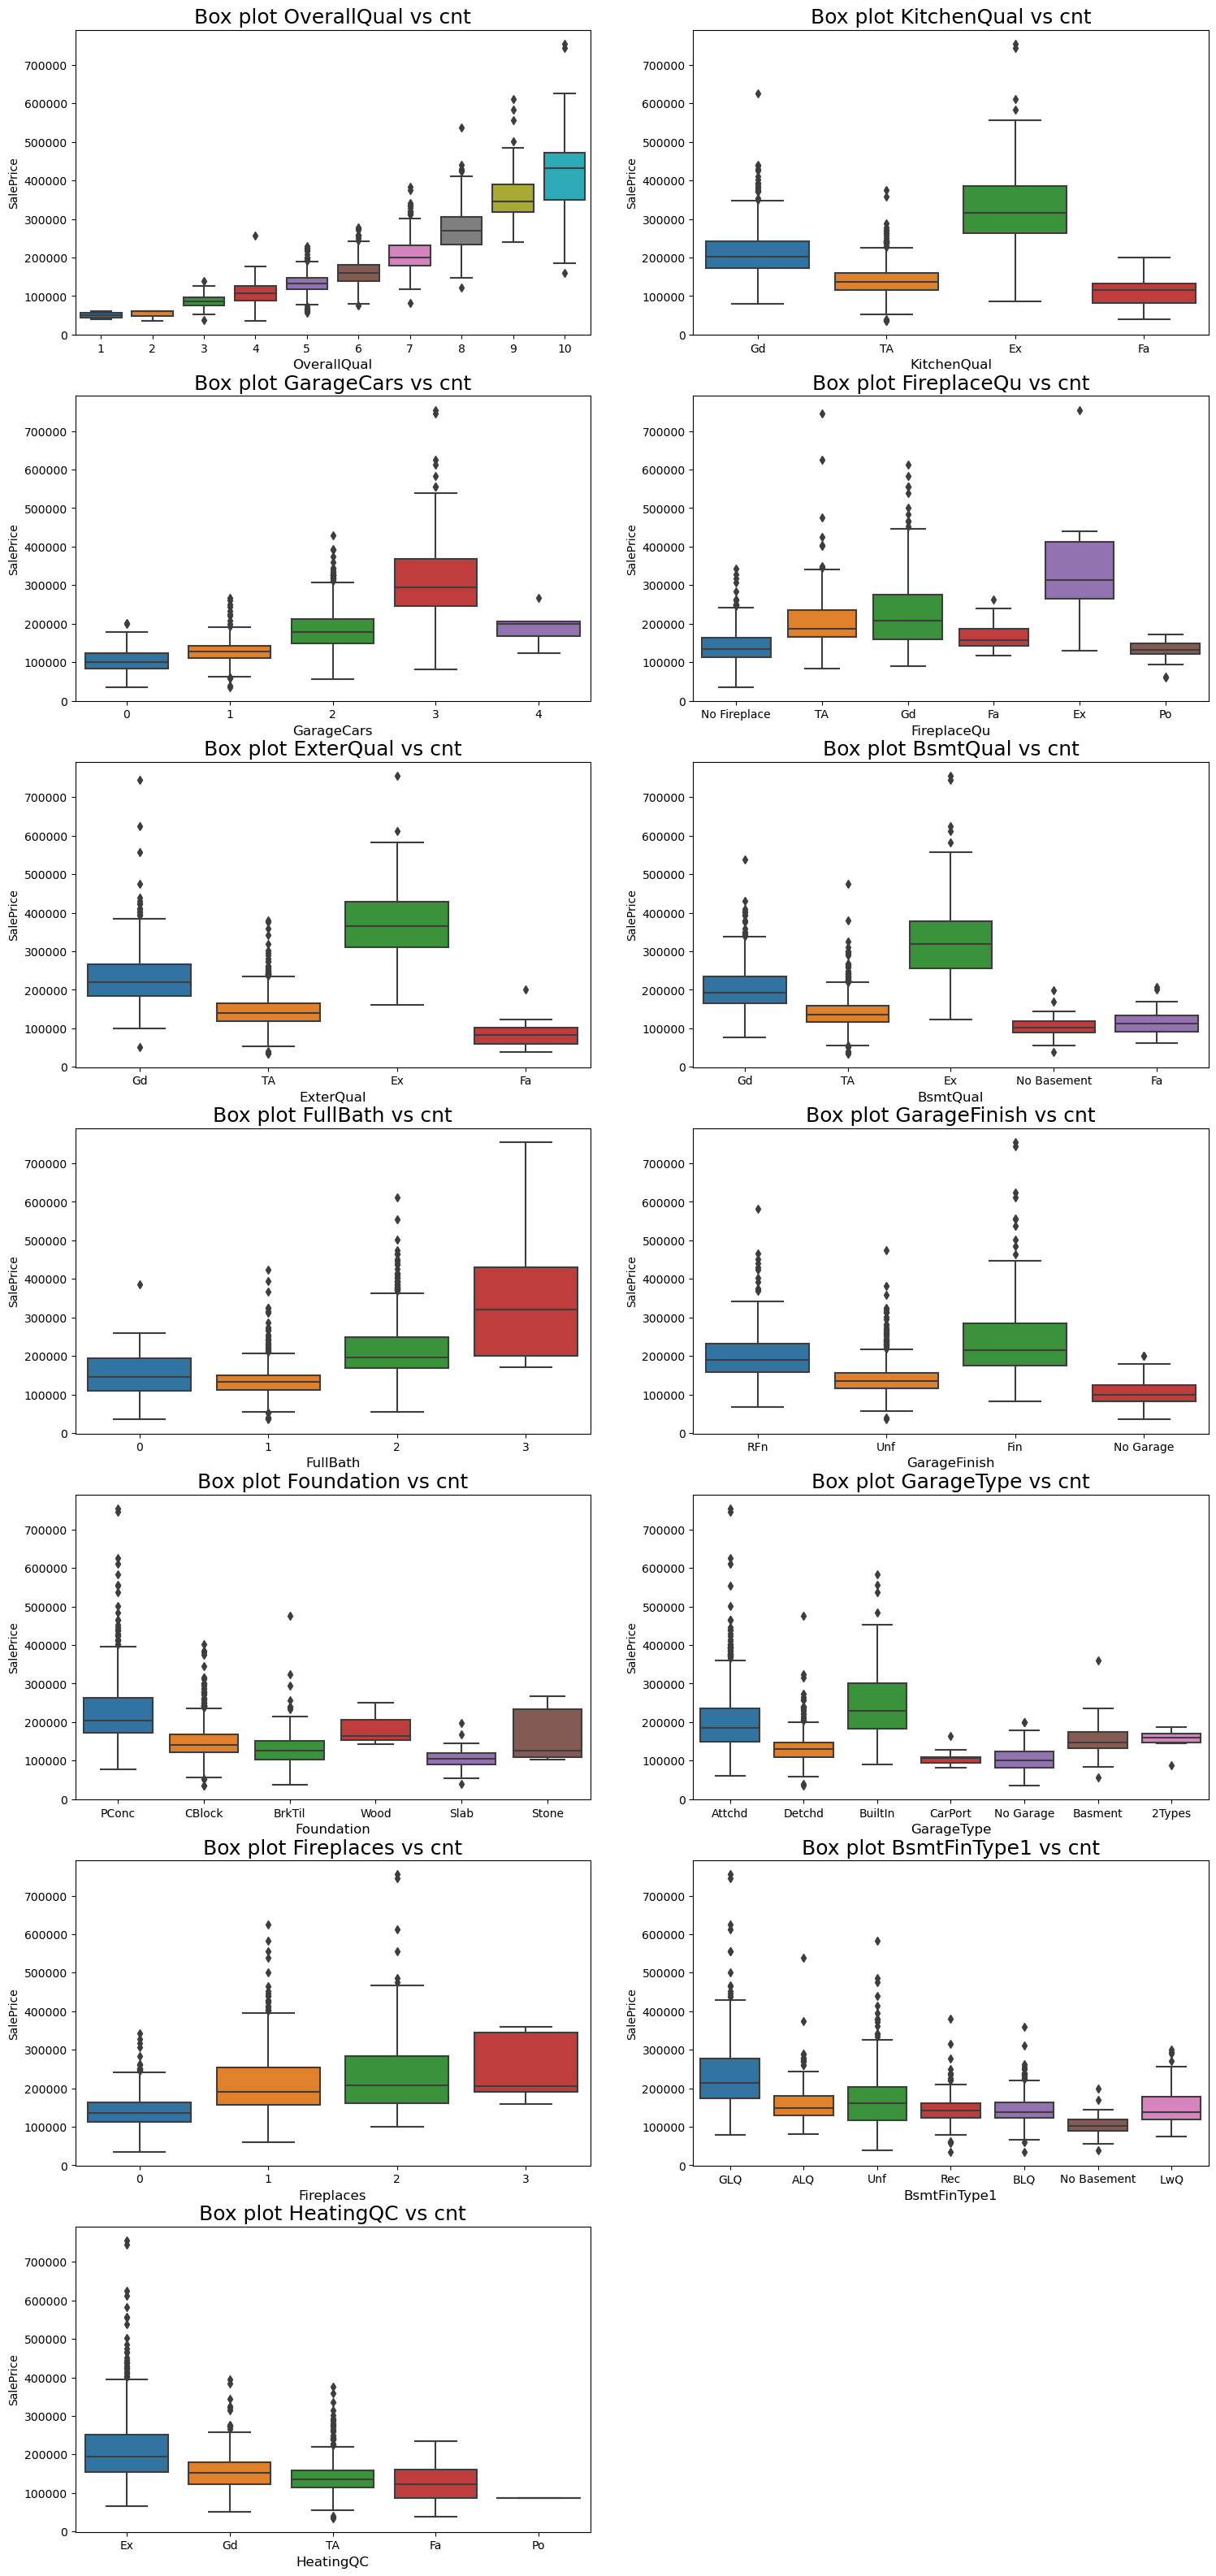

In [28]:
# We now use Boxplot to visualize the distribution of categorical columns

cat_cols= ['OverallQual','KitchenQual','GarageCars','FireplaceQu','ExterQual','BsmtQual','FullBath','GarageFinish','Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']

plt.figure(figsize=[18, 40])

for i, col in enumerate(cat_cols, 1):
    plt.subplot(7,2,i)
    title= f'Box plot {col} vs cnt'
    x_label= f'{col}'
    fig= sns.boxplot(data= house_df, x= col, y= 'SalePrice')
    fig.set_title(title, fontdict= { 'fontsize': 18})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12})
plt.show()

Plot the correlations on a heatmap

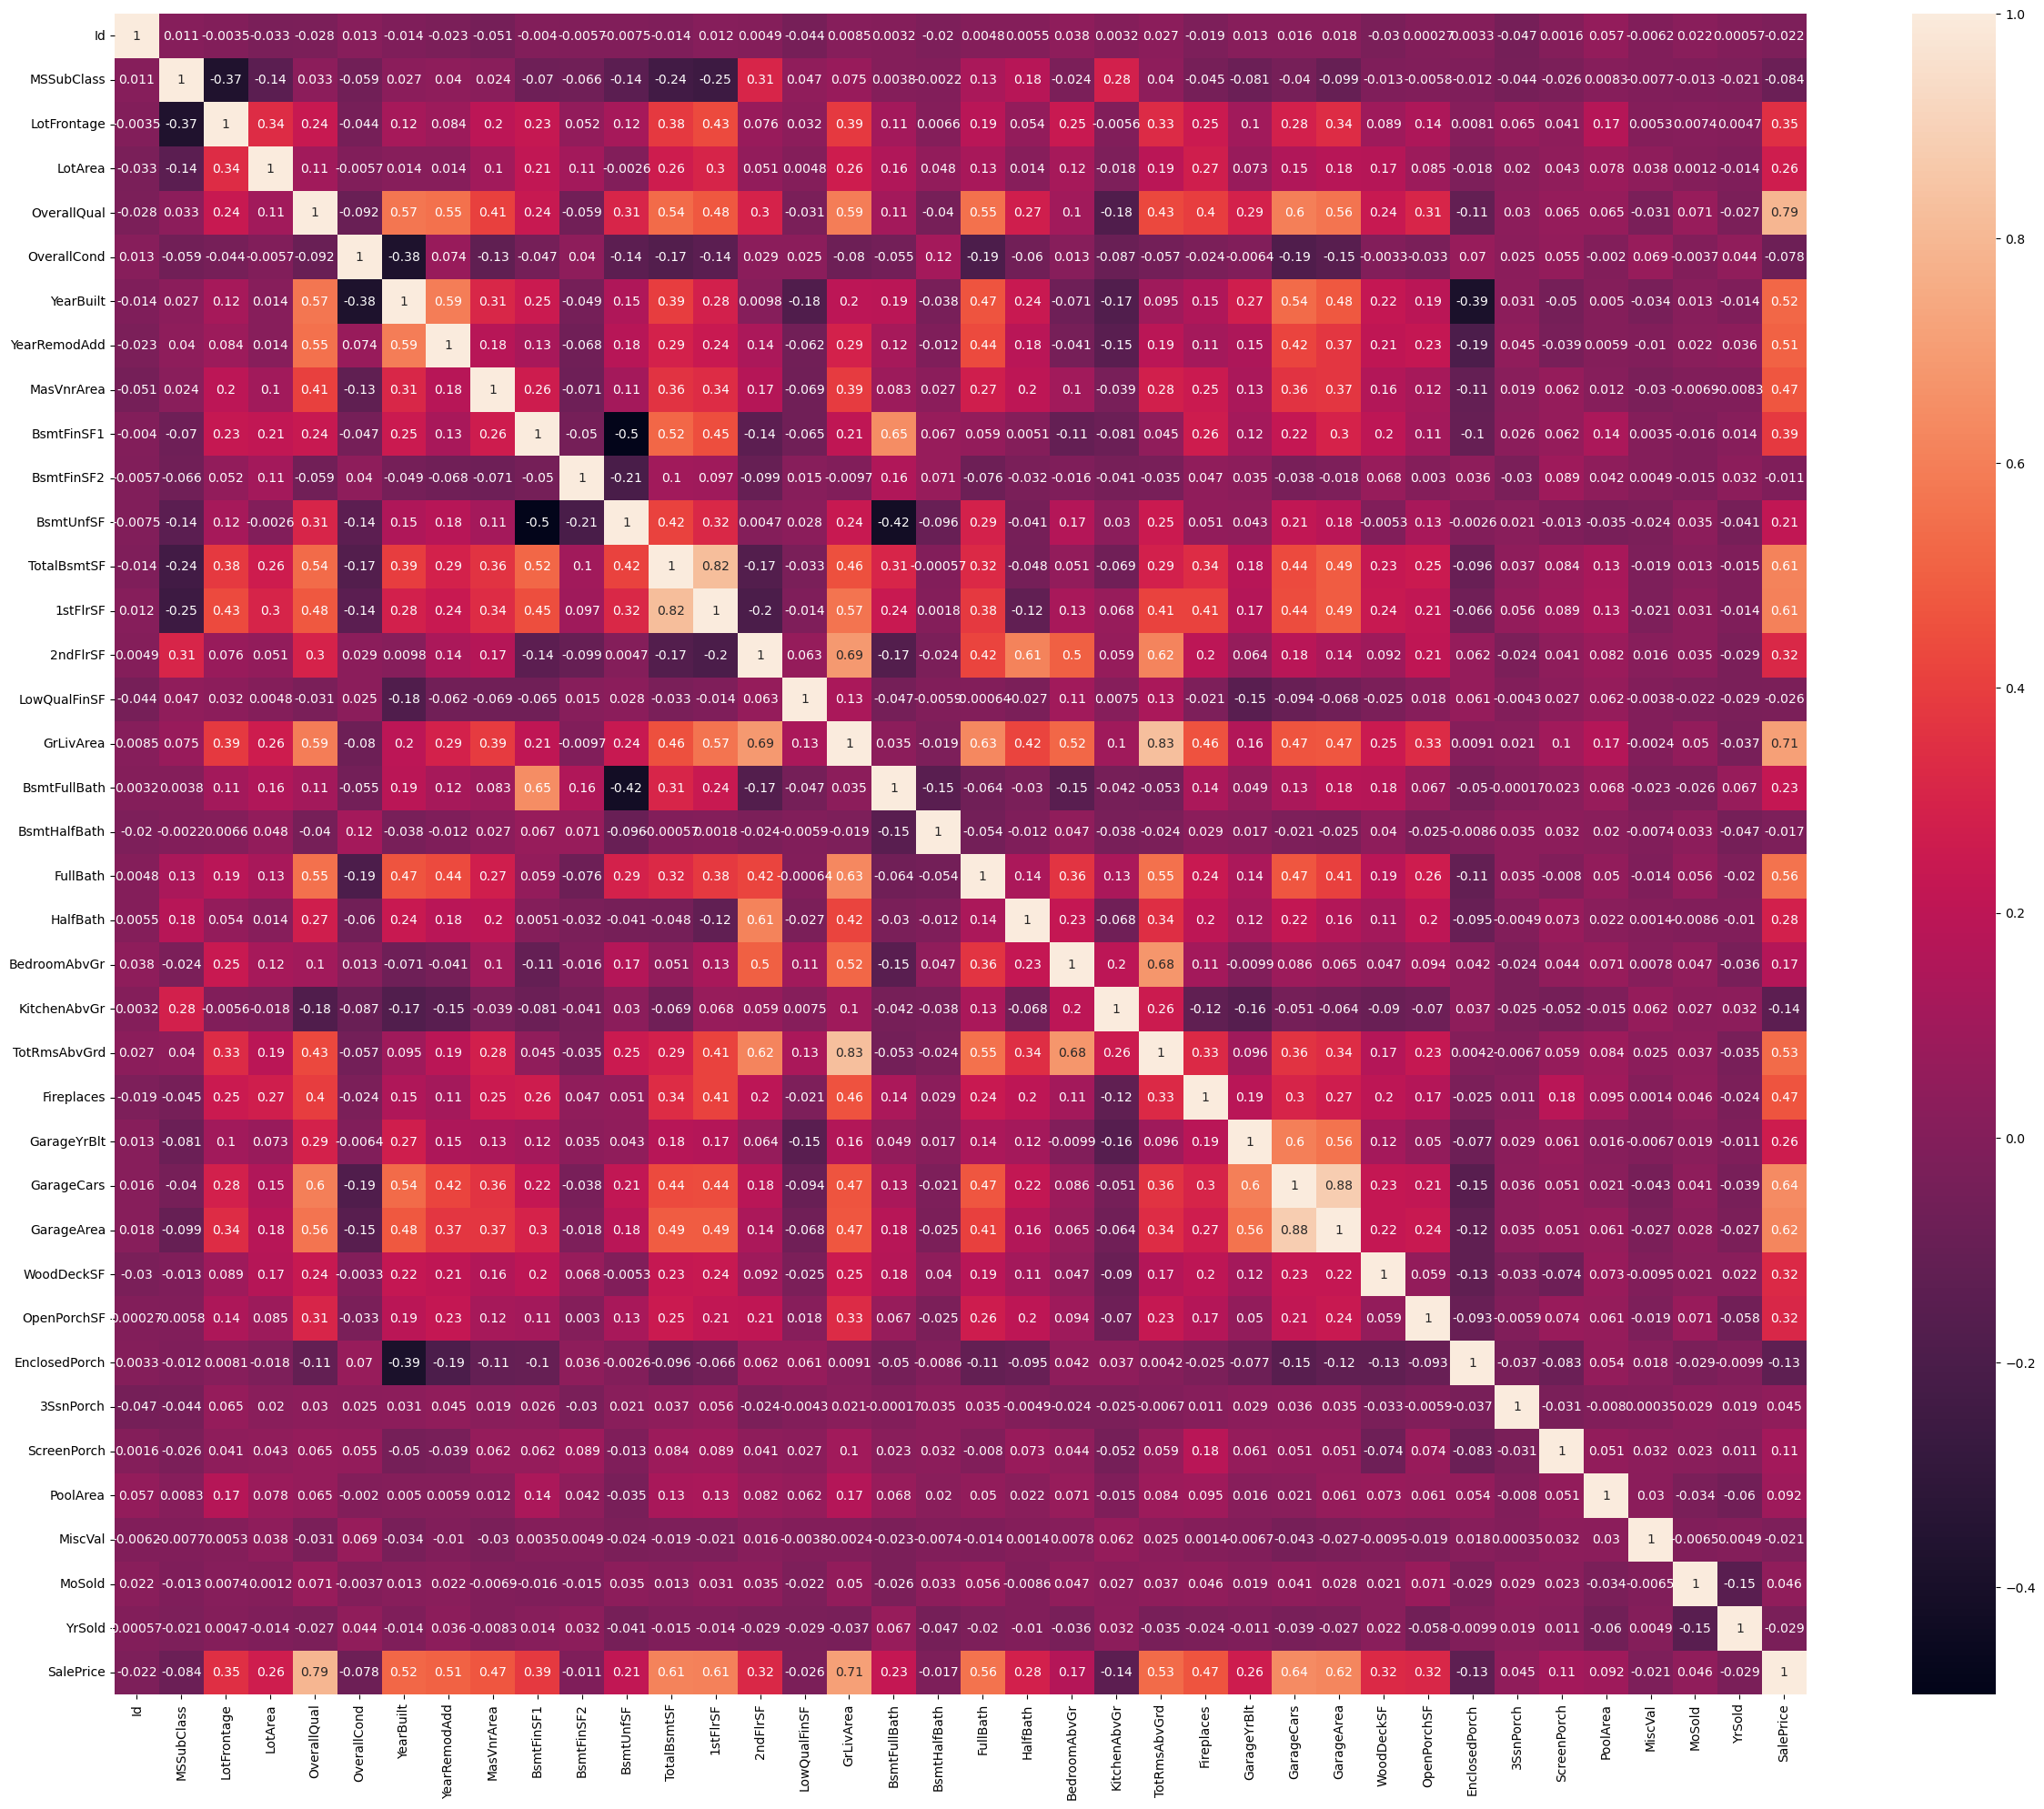

In [29]:
# Figure size
plt.figure(figsize=(30, 24))
# Heatmap
sns.heatmap(house_df.corr(), annot=True)
plt.show()


Observation:
+ SalesPrice has positive correlation with LotFrontage, YearBuilt, TotalBsmtSF, GrLivArea, TotalRmsAbvGrd, Fireplaces, GarageCars, GarageArea, OverallQual
+ SalesPrice has negative correlation with OverallCond, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch
+ Correlationship among TotRmsAbvGrd and GrLivArea, GarageCars and GarageArea 

### Data cleaning

In [30]:
# Drop column id because it does not contribute to the prediction
house_df = house_df.drop(['Id'], axis = 1)


2 independent variables  GarageCars and GarageArea have high collineariy (0.88), whereas they have almost the same correlation value with target variable SalesPrice (0.62 and 0.64), it's neccessary to remove 1 variable 

In [31]:
house_df = house_df.drop(['GarageArea'], axis = 1)

In the same manner, TotRmsAbvGrd and GrLivArea also have high collinearity (0.83). Since GrLivArea has higher correlation vs target variable (0.71), we can drop the other column of TotRmsAbvGrd 

In [32]:
house_df = house_df.drop(['TotRmsAbvGrd'], axis = 1)

In [33]:
#Delete these 2 columns from numeric_cols
numeric_cols = [ col for col in numeric_cols if col not in ['GarageArea','TotRmsAbvGrd' ]]

### Data preparation

Need to convert numerical values of categorical column into meaningful strings 

In [34]:
#MSSubClass 
#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

house_df['MSSubClass'] = house_df['MSSubClass'].map({20:'1-STORY_1946', 30:'1-STORY_1945', 40:'1-STORY_W/FINISHED', 45:'1-1/2_STORY_UNFINISHED',50:'1-1/2_STORY_FINISHED',
60:'2-STORY_1946_NEWER', 70:'2-STORY_1945_OLDER', 75:'2-1/2_STORY', 80:'SPLIT_OR_MULTI-LEVEL', 85:'SPLIT_FOYER', 90:'DUPLEX_ALL_STYLES', 120:'1-STORY_PUD'
,150:'1-1/2_STORY_PUD', 160:'2-STORY_PUD_1946', 180:'PUD_MULTILEVEL', 190: '2_FAMILY_CONVERSION'})

In [35]:
house_df['MSSubClass'].value_counts()

1-STORY_1946              536
2-STORY_1946_NEWER        299
1-1/2_STORY_FINISHED      144
1-STORY_PUD                87
1-STORY_1945               69
2-STORY_PUD_1946           63
2-STORY_1945_OLDER         60
SPLIT_OR_MULTI-LEVEL       57
DUPLEX_ALL_STYLES          52
2_FAMILY_CONVERSION        30
SPLIT_FOYER                20
2-1/2_STORY                16
1-1/2_STORY_UNFINISHED     12
PUD_MULTILEVEL             10
1-STORY_W/FINISHED          4
Name: MSSubClass, dtype: int64

In [36]:
house_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'Enc

In [37]:
#create a house DF that contains only categorical values
house_df_cat = house_df.select_dtypes(include= 'object')
house_df_cat

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2-STORY_1946_NEWER,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,1-STORY_1946,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,2-STORY_1946_NEWER,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,2-STORY_1945_OLDER,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,2-STORY_1946_NEWER,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-STORY_1946_NEWER,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1456,1-STORY_1946,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Attchd,Unf,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
1457,2-STORY_1945_OLDER,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,Attchd,RFn,TA,TA,Y,No Pool,GdPrv,Shed,WD,Normal
1458,1-STORY_1946,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [38]:
# get the columns that contain only 2 unique values -> binary encoding
cat_bin_cols = house_df_cat.columns[house_df_cat.nunique() == 2]
cat_bin_cols

Index(['Street', 'Utilities', 'CentralAir'], dtype='object')

In [39]:
house_df_cat[cat_bin_cols].value_counts()

Street  Utilities  CentralAir
Pave    AllPub     Y             1359
                   N               93
Grvl    AllPub     Y                4
                   N                2
Pave    NoSeWa     Y                1
dtype: int64

In [40]:
# encode 3 columns Street, Utilities, CentralAir with binary values
house_df['Street']= house_df.Street.map(lambda x: 1 if x== 'Pave' else 0)
house_df['Utilities']= house_df.Utilities.map(lambda x: 1 if x== 'AllPub' else 0)
house_df['CentralAir']= house_df.CentralAir.map(lambda x: 1 if x== 'Y' else 0)

In [41]:
# apply one-hot encoding for all categorical columns, except for the 3 column that have already encoded
categorical_cols = [ col for col in house_df_cat.columns.tolist() if col not in cat_bin_cols.tolist()]
house_df_dummies = pd.get_dummies(house_df_cat[categorical_cols], drop_first=True)

In [42]:
house_df_dummies.head()

,MSSubClass_1-1/2_STORY_UNFINISHED,MSSubClass_1-STORY_1945,MSSubClass_1-STORY_1946,MSSubClass_1-STORY_PUD,MSSubClass_1-STORY_W/FINISHED,MSSubClass_2-1/2_STORY,MSSubClass_2-STORY_1945_OLDER,MSSubClass_2-STORY_1946_NEWER,MSSubClass_2-STORY_PUD_1946,MSSubClass_2_FAMILY_CONVERSION,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
#Drop categorical columns in original DF
house_df = house_df.drop(categorical_cols, axis = 1)

In [44]:
#concatenate the dataframe with the DF with dummies variables
house_df = pd.concat([house_df, house_df_dummies], axis=1)

In [45]:
house_df.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,1,1,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1,1,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,1,1,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1,1,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,1,1,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [46]:
# Transform 'SalePrice' because it is right-skewed, and remove SalePrice column
house_df['SalePrice_log']= np.log(house_df['SalePrice'])
house_df = house_df.drop('SalePrice', axis= 1)

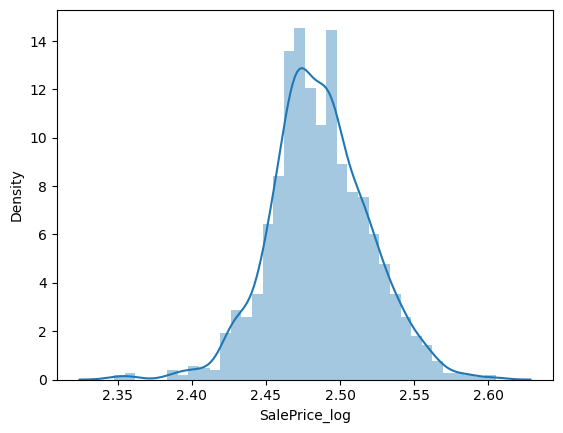

In [47]:
sns.distplot(np.log(house_df['SalePrice_log']))
plt.show()

### Model building and evaluation

In [48]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(house_df, train_size=0.7, test_size=0.3, random_state=102)

We need to normalize some numeric columns before the model training. It's best practice to perform normalization on training dataset first, instead of the whole dataset

In [49]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

In [50]:
#extract again the numeric columns
numeric_cols = house_df.select_dtypes(exclude= 'object').columns.tolist()

In [51]:
# Scale these variables using 'fit_transform'
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

In [52]:
df_train.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice_log
420,0.371146,-0.340903,0.044302,0.031311,0.658442,-0.515780,0.864366,0.626512,0.582624,1.917978,...,-0.054286,-0.307115,-0.044302,0.392011,-0.062715,12.035661,-0.122109,-2.104959,-0.309020,0.566360
281,-0.411069,-0.325266,0.044302,0.031311,-0.065206,-0.515780,1.160855,1.013282,-0.180809,1.031625,...,-0.054286,3.256113,-0.044302,-2.550951,-0.062715,-0.083086,-0.122109,-2.104959,3.236033,0.294259
545,0.458058,0.416034,0.044302,0.031311,0.658442,-0.515780,0.567876,0.143050,0.455385,1.244438,...,-0.054286,-0.307115,-0.044302,0.392011,-0.062715,-0.083086,-0.122109,0.475069,-0.309020,0.827012
315,0.066951,-0.258809,0.044302,0.031311,0.658442,-0.515780,1.094969,0.964936,-0.574093,-0.021467,...,-0.054286,-0.307115,-0.044302,0.392011,-0.062715,-0.083086,-0.122109,0.475069,-0.309020,0.341056
330,0.153864,0.057168,0.044302,0.031311,-0.788855,-1.393465,-0.222762,-1.017259,-0.088272,-0.866134,...,-0.054286,-0.307115,-0.044302,0.392011,-0.062715,-0.083086,-0.122109,0.475069,-0.309020,-0.807454


In [53]:
# Split the train dataset into X_train and y_train
y_train = df_train.pop('SalePrice_log')
X_train = df_train

We also need to apply transformation to Test dataset

In [54]:
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [55]:
# Split the 'df_test' set into X_test and y_test
y_test = df_test.pop('SalePrice_log')
X_test = df_test

### Ridge Regression

In [56]:
# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 10.0]} 

In [57]:
# Create and train the Ridge regression model with GridSearchCV
ridge = Ridge(random_state= 64)
ridge_gscv = GridSearchCV(ridge, param_grid, cv=3)
ridge_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(random_state=64),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0,
                                   10.0]})

In [58]:
# Checking best estimator 
ridge_gscv.best_estimator_

Ridge(alpha=10.0, random_state=64)

In [59]:
# Checking best MAE
ridge_gscv.best_score_

0.7733738882562681

In [60]:
best_alpha = ridge_gscv.best_params_['alpha']
best_alpha

10.0

Optimal value for alpha is 10

In [61]:
#Fit model using best estimator
ridge_model = ridge_gscv.best_estimator_
ridge_model.fit(X_train, y_train)

Ridge(alpha=10.0, random_state=64)

In [62]:
# Evaluate model on training dataset
y_train_pred= ridge_model.predict(X_train)

In [63]:
print("Metrics evaluation on training dataset")
print( 'r2:', r2_score(y_train, y_train_pred))
print( 'MSE:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE:', mean_absolute_error(y_train, y_train_pred))

Metrics evaluation on training dataset
r2: 0.9541225675168717
MSE: 0.045877432483128255
RMSE: 0.21419017830686882
MAE: 0.15237744281676283


In [64]:
# Evaluating on Test dataset
y_test_pred= ridge_model.predict(X_test)
print("Metrics evaluation on Test dataset")
print( 'r2:', r2_score(y_test, y_test_pred))
print( 'MSE:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE:', mean_absolute_error(y_test, y_test_pred))

Metrics evaluation on Test dataset
r2: 0.7863622558392906
MSE: 0.20796356795330698
RMSE: 0.456030227017143
MAE: 0.25068123020352645


In [65]:
#Ridge coefficients
ridge_model.coef_

array([ 1.03415130e-03,  7.86886095e-02,  5.68479909e-03,  2.50278944e-02,
        1.36345507e-01,  1.16406983e-01,  1.47644503e-01,  3.28857158e-02,
        3.00042976e-02,  5.93985066e-02,  1.15302035e-02, -6.38009278e-03,
        5.87749352e-02,  3.56087311e-02,  1.16554488e-01,  1.14738496e-01,
        2.50782695e-03,  1.87744902e-01,  2.15074905e-02, -4.78690199e-03,
        3.47757583e-02,  3.59747708e-02,  9.93908294e-03, -5.90103139e-03,
        1.10746174e-02, -2.04405983e-02,  7.01553070e-02,  2.19028603e-02,
        1.33955344e-02,  1.92620748e-02,  4.94737798e-03,  3.73298425e-02,
        2.43809824e-01,  6.65166140e-03, -1.35689617e-02, -1.10056358e-02,
        8.52917508e-03, -3.13007819e-02,  1.06510560e-03, -9.85591137e-03,
       -1.24196276e-02,  1.69888091e-02,  1.96428456e-02, -9.69492698e-06,
       -3.67646572e-02, -3.13738885e-03, -7.83743116e-03, -1.51127818e-02,
       -1.41349676e-03, -2.99541631e-02,  1.38236201e-01,  7.43922598e-02,
        2.84524411e-01,  

In [66]:
len(ridge_model.coef_)

270

In [67]:
# Ridge intercept
ridge_model.intercept_

-1.7904865792122954e-15

### Lasso Regression

In [68]:
# Create and train the Ridge regression model with GridSearchCV
lasso = Lasso(random_state= 64)
lasso_gscv = GridSearchCV(lasso, param_grid, cv=3)
lasso_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(random_state=64),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0,
                                   10.0]})

In [69]:
#lasso best estimator
lasso_gscv.best_estimator_

Lasso(alpha=0.05, random_state=64)

Optimal value for alpha is 0.05

In [70]:
#Fit the model using best estimator
lasso_model = lasso_gscv.best_estimator_
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.05, random_state=64)

In [71]:
y_train_pred= lasso_model.predict(X_train)
print("Metrics evaluation on training dataset")
print('r2:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', (mean_squared_error(y_train, y_train_pred)**.5))
print('MAE:', mean_absolute_error(y_train, y_train_pred))

Metrics evaluation on training dataset
r2: 0.8654730218706456
MSE: 0.1345269781293544
RMSE: 0.3667791953333155
MAE: 0.24612331202750723


In [72]:
y_test_pred= lasso_model.predict(X_test)
print("Metrics evaluation on test dataset")
print('r2:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', (mean_squared_error(y_test, y_test_pred)**.5))
print('MAE:', mean_absolute_error(y_test, y_test_pred))

Metrics evaluation on test dataset
r2: 0.8506056640010216
MSE: 0.14542645199900325
RMSE: 0.38134820308872996
MAE: 0.2638037479333246


In [73]:
# Lasso intercept
lasso_model.intercept_

-2.3618194783780936e-15

In [74]:
#number of features in lasso model
lasso_coef= pd.Series(lasso_model.coef_, index= X_train.columns)
selected_features_lasso= len(lasso_coef[lasso_coef != 0])
selected_features_lasso

33

### Conclusion

+ Ridge Regression model on test dataset: r2 score= 0.786, MAE= 0.250, RMSE= 0.456
+ Lasso Regression model on test dataset: r2 score= 0.850, MAE= 0.264, RMSE= 0.145
+ Lasso has almost the same r2 between Training & test datasets, whereas Ridge has higher r2 value in Training dataset than in Test dataset
+ Lasso has fewer features after eliminating the features as 33, in comparison to Ridge's number of features 270, thus the Lasso model is simpler and imply better performance 

### Additional questions

In [75]:
# Double the value of optimal alpha in Ridge
ridge_model2 = Ridge(alpha= 20, random_state= 64)
ridge_model2.fit(X_train, y_train)

Ridge(alpha=20, random_state=64)

In [77]:
# Top 10 features with doubled value of optimal alpha 
ridge_coef= pd.Series(ridge_model2.coef_, index= X_train.columns)
top10_ridge=  ridge_coef[abs(ridge_coef).nlargest(10).index]
top10_ridge

RoofMatl_CompShg    0.241392
RoofMatl_Tar&Grv    0.197429
MSZoning_RL         0.194236
GrLivArea           0.175307
PoolArea            0.171047
PoolQC_No Pool      0.150960
MSZoning_RM         0.150102
OverallQual         0.139877
YearBuilt           0.124751
1stFlrSF            0.116565
dtype: float64

In [78]:
## Double the value of optimal alpha in Lasso
lasso_model2 = Lasso(alpha= 0.1, random_state=64)
lasso_model2.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=64)

In [79]:
# Top 10 features with doubled value of optimal alpha in Lasso
lasso_coef= pd.Series(lasso_model2.coef_, index= X_train.columns)
top10_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(10).index]
top10_lasso

OverallQual     0.348582
GrLivArea       0.208030
GarageCars      0.142838
YearRemodAdd    0.076889
YearBuilt       0.060193
TotalBsmtSF     0.048129
MSZoning_RM    -0.042853
1stFlrSF        0.034942
CentralAir      0.024102
Fireplaces      0.022590
dtype: float64

#### Question 3

In [80]:
# top 5 features in lasso model
top10_lasso.nlargest(5)

OverallQual     0.348582
GrLivArea       0.208030
GarageCars      0.142838
YearRemodAdd    0.076889
YearBuilt       0.060193
dtype: float64